In [1]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [8]:
!kaggle competitions download -c titanic -p /content/drive/MyDrive/Machine_Learning/kaggle

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 5.38MB/s]


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [76]:
train_dir = "/content/drive/MyDrive/Machine_Learning/titanic/train.csv"
test_dir = "/content/drive/MyDrive/Machine_Learning/titanic/test.csv"
gender_submission = "/content/drive/MyDrive/Machine_Learning/titanic/gender_submission.csv"

In [87]:
df = pd.read_csv(train_dir)
df_test = pd.read_csv(test_dir)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
df.drop(df.columns[[3, 8, 10]], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])
scaler = MinMaxScaler()
df_encoded[["Age", "Fare"]] = scaler.fit_transform(df_encoded[["Age", "Fare"]])
df_encoded

df_test.drop(df_test.columns[[2, 7, 9]], axis=1, inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test_encoded = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])
scaler = MinMaxScaler()
df_test_encoded[["Age", "Fare"]] = scaler.fit_transform(df_test_encoded[["Age", "Fare"]])
df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,2,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,4,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,5,0,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.334004,0,0,0.025374,0,1,0,0,1
887,888,1,1,0.233476,0,0,0.058556,1,0,0,0,1
888,889,0,3,0.346569,1,2,0.045771,1,0,0,0,1
889,890,1,1,0.321438,0,0,0.058556,0,1,1,0,0


In [90]:
df_test_encoded

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0.452723,0,0,0.015282,0,1,0,1,0
1,893,3,0.617566,1,0,0.013663,1,0,0,0,1
2,894,2,0.815377,0,0,0.018909,0,1,0,1,0
3,895,3,0.353818,0,0,0.016908,0,1,0,0,1
4,896,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.353818,0,0,0.015713,0,1,0,0,1
414,1306,1,0.512066,0,0,0.212559,1,0,1,0,0
415,1307,3,0.505473,0,0,0.014151,0,1,0,0,1
416,1308,3,0.353818,0,0,0.015713,0,1,0,0,1


In [92]:
X_train = df_encoded.drop(['PassengerId', 'Survived'], axis=1)
y_train = df_encoded['Survived']

X_test = df_test_encoded.drop(['PassengerId'], axis=1)

In [93]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

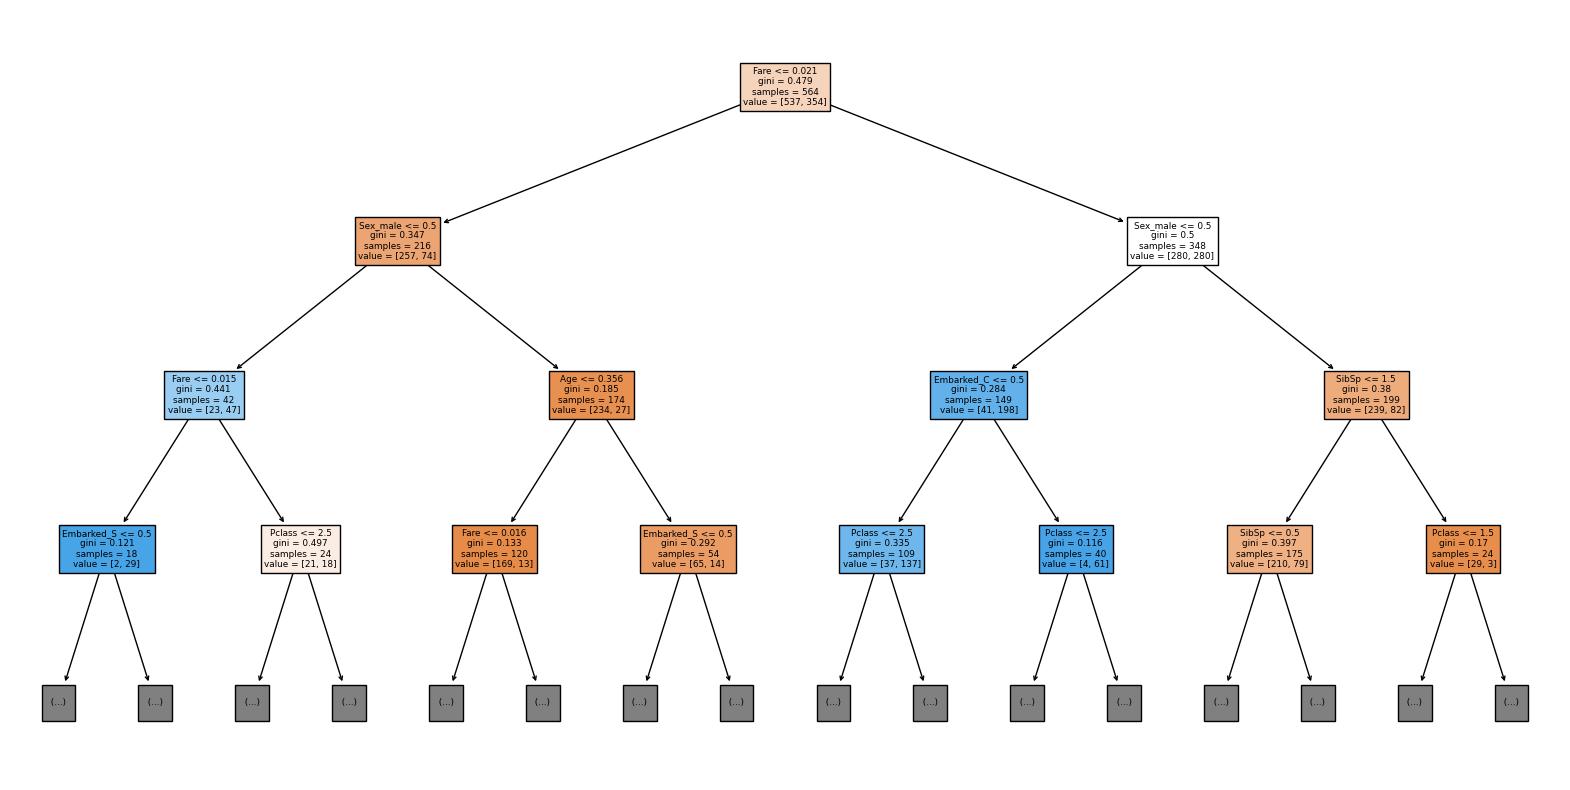

In [94]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose one tree from the forest
tree = model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=3)
plt.show()


In [95]:
predictions = model.predict(X_test)

In [96]:
output_df = pd.DataFrame({
    'PassengerId': df_test_encoded['PassengerId'],
    'Survived': predictions
})

In [97]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [98]:
output_df.to_csv('titanic_survival_predictions.csv', index=False)